In [1]:
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
#Data Analysis 

import pandas as pd
import numpy as np


In [3]:
#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Machine Learning

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
#Read data

df = pd.read_csv("ks-projects-201612.csv", encoding= 'cp1252', low_memory = False)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [6]:
#Strip out while spaces 
df.columns = [x.strip() for x in df.columns.tolist()]

#Check 'name' column, 'category' column, and 'ID' contain Null value

df[(df['name'].isnull()) | (df['category'].isnull()) | (df['ID'].isnull())]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
36671,1218074363,I am Rupert,NaN,Webseries,Film & Video,GBP,2014-05-16 22:25:57,2000,2014-03-27 21:25:57,5,failed,1,GB,8.26779725,NaN,NaN,NaN
41069,124438738,BlanketPals TM,NaN,Interactive Design,Design,USD,2015-03-25 20:51:48,9750,2015-02-23 21:51:48,10890.45,successful,107,US,10890.45,NaN,NaN,NaN
63544,1378236004,{string&&loop} Knitting Craft with Code,NaN,Apparel,Fashion,USD,2016-05-28 00:00:00,1800,2016-04-29 21:04:40,2308,successful,119,US,2308,NaN,NaN,NaN
96753,1574873938,American Pin-up Revisitedd,NaN,Art,Art,USD,2014-04-03 17:52:09,7500,2014-03-04 17:52:09,100,failed,1,US,100,NaN,NaN,NaN
142830,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29 15:04:00,200000,2012-01-01 12:35:31,100,failed,1,US,100,NaN,NaN,NaN,NaN
262901,634871725,NaN,Video Games,Games,GBP,2013-01-06 23:00:00,2000,2012-12-19 23:57:48,196,failed,12,GB,317.7284362,NaN,NaN,NaN,NaN
265251,648853978,NaN,Product Design,Design,USD,2016-07-18 05:01:47,2500,2016-06-18 05:01:47,0,suspended,0,US,0,NaN,NaN,NaN,NaN
269930,676846639,Uplift: The Wearable iPhone Case with Zipline&...,NaN,Design,Design,USD,2011-04-04 20:08:17,50000,2011-03-05 20:08:17,1665,canceled,10,US,1665,NaN,NaN,NaN
289847,796533179,NaN,Painting,Art,USD,2011-12-05 05:59:00,35000,2011-11-06 23:55:55,220,failed,5,US,220,NaN,NaN,NaN,NaN


In [7]:
#Drop all the rows that contain Null value
df = df.dropna(axis=0, subset=['ID', 'name', 'category'])

#Delete last four columns
df = df.iloc[:,:-4]

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [8]:
#Check 30 top main categories
m = df.main_category.value_counts().head(30)
print(m)

Film & Video        57678
Music               46744
Publishing          34233
Games               28007
Technology          26128
Art                 23973
Design              23870
Food                21229
Fashion             18398
Theater              9972
Photography          9680
Comics               8753
Crafts               7187
Journalism           4073
Dance                3375
Fiction                35
Product Design         29
Documentary            28
Nonfiction             27
Children's Books       18
Tabletop Games         14
Shorts                 13
Video Games            12
Mixed Media            11
Art Books              10
Apparel                 9
Narrative Film          8
Web                     8
Indie Rock              7
Apps                    7
Name: main_category, dtype: int64


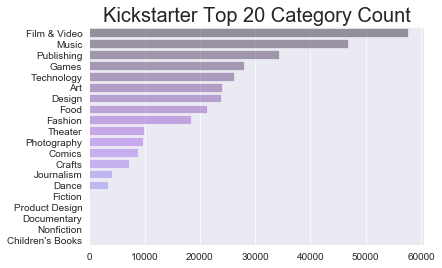

In [9]:
sns.set_style('darkgrid')

#pick top 20 instead
m = df.main_category.value_counts().head(20)

x = m.values
y = m.index

ax = sns.barplot(y=y, x=x, palette="cool_d", alpha=0.5)


plt.title('Kickstarter Top 20 Category Count', fontsize=20)
plt.show()

In [ ]:
#查看各國幣值出現次數, 結論：西方國家使用者居多

In [10]:
c = df.currency.value_counts().head(5)

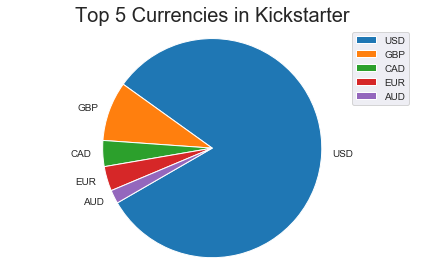

In [11]:
labels = c.index
sizes = c.values

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
plt.title('Top 5 Currencies in Kickstarter', fontsize=20)
patches, texts = plt.pie(sizes, labels = labels, startangle=210)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
#檢查看哪個國家用最多Kickstarter平台

In [14]:
#Data cleaning
df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.value_counts()
replace = df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.unique().tolist()
df.loc[:,'country'] = df.country.replace(to_replace=replace, value='None')

In [23]:
m = df.country.value_counts().head(10)

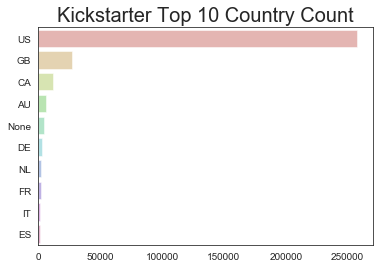

In [29]:
sns.set_style('white')

x = m.values
y = m.index

ax = sns.barplot(y=y, x=x, palette="hls", alpha=0.5)

plt.title('Kickstarter Top 10 Country Count', fontsize=20)
plt.show()